In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import tree
import graphviz

%matplotlib inline

In [2]:
df = pd.read_csv('censusdata.csv', header=None)

## Convert columns 

In [3]:
for i,v in enumerate(df):
    print(i,v)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14


## Columns
- age (continuous)
- workclass: Federal-gov, Local-gov, State-gov, Without- pay, Never-worked, Self-emp-inc, Self-emp-not-inc, Private
- final-weight (continuous)
- education num (continuous)
- martial-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [4]:
columns = ['age', 'workclass', 'final-weight', 'education', 
           'education-num', 'marital-status', 'occupation', 'relationship', 
           'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']

In [5]:
df.columns = columns

In [6]:
df = pd.concat([df, pd.get_dummies(df['workclass'])], axis=1)

In [7]:
df.drop('education', axis=1, inplace=True)

In [8]:
df = pd.concat([df, pd.get_dummies(df['marital-status'])], axis=1)

In [9]:
df = pd.concat([df, pd.get_dummies(df['occupation'])], axis=1)

In [10]:
df = pd.concat([df, pd.get_dummies(df['relationship'])], axis=1)

In [11]:
df = pd.concat([df, pd.get_dummies(df['race'])], axis=1)

In [12]:
df = pd.concat([df, pd.get_dummies(df['sex'])], axis=1)

In [13]:
df = pd.concat([df, pd.get_dummies(df['native-country'])], axis=1)

In [14]:
df.drop(['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], axis=1, inplace=True)

In [26]:
over50K = np.where(df.income == ' >50K', 1, 0)

In [27]:
df['income>50K'] = over50K

In [29]:
df.drop('income', axis=1, inplace=True)

In [30]:
for i,v in enumerate(df):
    print(i,v)

0 age
1 final-weight
2 education-num
3 capital-gain
4 capital-loss
5 hours-per-week
6  ?
7  Federal-gov
8  Local-gov
9  Never-worked
10  Private
11  Self-emp-inc
12  Self-emp-not-inc
13  State-gov
14  Without-pay
15  Divorced
16  Married-AF-spouse
17  Married-civ-spouse
18  Married-spouse-absent
19  Never-married
20  Separated
21  Widowed
22  ?
23  Adm-clerical
24  Armed-Forces
25  Craft-repair
26  Exec-managerial
27  Farming-fishing
28  Handlers-cleaners
29  Machine-op-inspct
30  Other-service
31  Priv-house-serv
32  Prof-specialty
33  Protective-serv
34  Sales
35  Tech-support
36  Transport-moving
37  Husband
38  Not-in-family
39  Other-relative
40  Own-child
41  Unmarried
42  Wife
43  Amer-Indian-Eskimo
44  Asian-Pac-Islander
45  Black
46  Other
47  White
48  Female
49  Male
50  ?
51  Cambodia
52  Canada
53  China
54  Columbia
55  Cuba
56  Dominican-Republic
57  Ecuador
58  El-Salvador
59  England
60  France
61  Germany
62  Greece
63  Guatemala
64  Haiti
65  Holand-Netherlands
66  H

In [18]:
df.rename(columns={"?":"unknown_occupation"}, inplace=True)

In [28]:
df['income>50K'].unique()

array([0, 1])

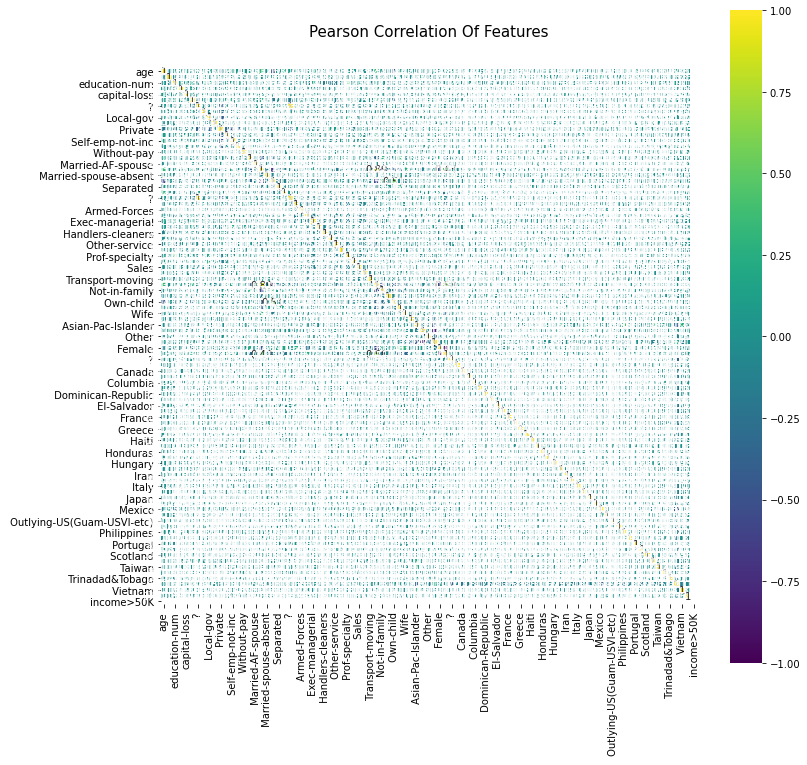

In [20]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation Of Features', y=1.05, size=15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [32]:
columns = list(df)
features_all = columns[0:92]
print(features_all, '\n')
target = columns[92]

['age', 'final-weight', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', ' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay', ' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed', ' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service', ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving', ' Husband', ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried', ' Wife', ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White', ' Female', ' Male', ' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England', ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti', ' Holand-Netherla

In [33]:
X = df[features_all]
y = df[target]

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)

In [35]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=.001)
rf.fit(Xtrain, ytrain)

RandomForestClassifier(min_samples_leaf=0.001)

In [36]:
rf.score(Xtrain, ytrain)

0.8598631098631099

In [37]:
rf.score(Xtest, ytest)

0.8499334629951889

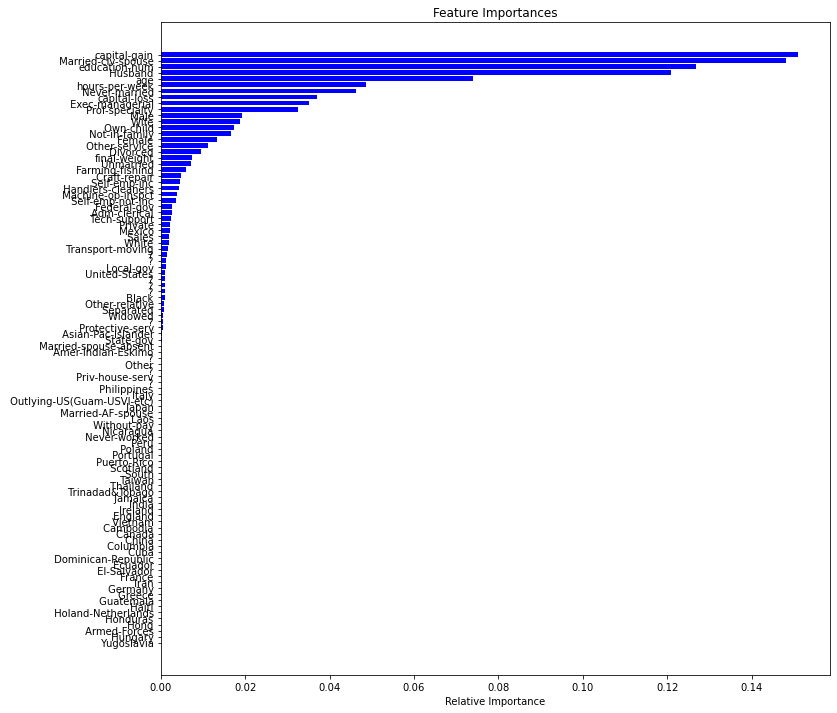

In [42]:
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.subplots(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [40]:
print(indices, importances)

[97 74 28 73 72 71 70 69 68 67 76 66 64 63 62 61 60 59 58 57 96 65 77 75
 79 94 93 92 91 90 89 88 87 85 11 83 16 81 18 80 84 78 86 26 35 56 50  8
 47 20 15 48 37 54 23 22 43 49 24 25  6 95 10  7 55 40 51 38 82 12 39 27
  9 14 33 32 13 29 31 45  1 17 34 52 42 44 46 53 36 30  4 21  5  0 41  2
 19  3] [7.39258774e-02 7.41265926e-03 1.26902985e-01 1.51102625e-01
 3.69657484e-02 4.87251027e-02 1.10265542e-03 1.34063614e-03
 7.92271840e-05 2.79401689e-03 1.22154181e-03 0.00000000e+00
 2.32191543e-03 4.57947740e-03 3.60013103e-03 3.25079088e-04
 0.00000000e+00 9.53909317e-03 0.00000000e+00 1.48210361e-01
 1.83403553e-04 4.62700709e-02 7.98819987e-04 6.06928012e-04
 9.25772268e-04 1.01680552e-03 2.17205943e-05 2.63222592e-03
 0.00000000e+00 4.75671211e-03 3.51171753e-02 6.03781127e-03
 4.27895276e-03 3.92810423e-03 1.11124261e-02 3.82757586e-05
 3.26141496e-02 5.50979946e-04 1.96764995e-03 2.40018808e-03
 1.75867738e-03 1.20813066e-01 1.65395075e-02 8.05384638e-04
 1.73444794e-02 7.07650441e-0

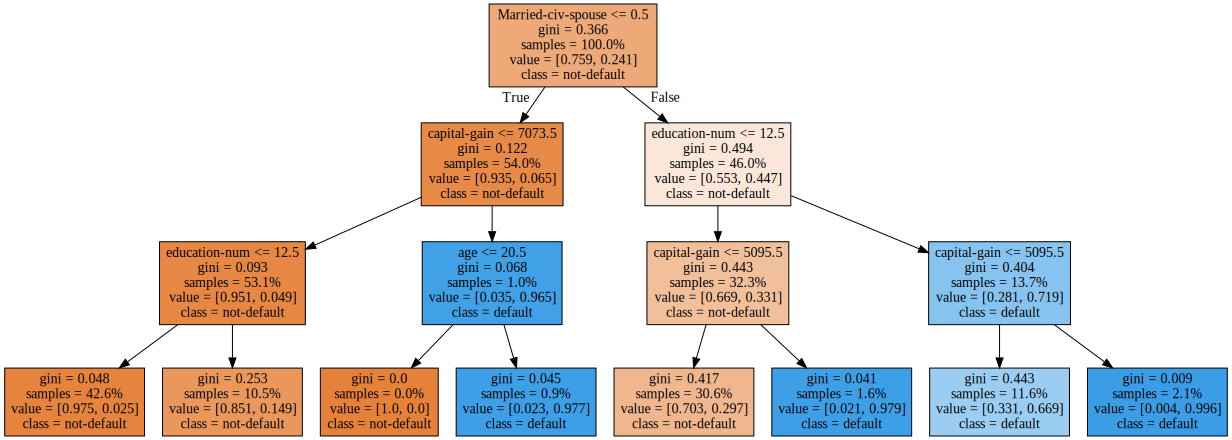

In [43]:
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X,y)
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=X.columns, class_names=['not-default', 'default'],
                     proportion=True, leaves_parallel=True, filled=True)
graphviz.Source(dot_data)